# Understanding Convolutional Neural Network - Handwriting recognition of Arabic Alphabets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tflearn.data_utils as du
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

/home/ravi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading the dataset

In [2]:
train_data = pd.read_csv(os.getcwd()+'/csvTrainImages 13440x1024.csv', header = None)
train_label = pd.read_csv(os.getcwd()+'/csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv(os.getcwd()+'/csvTestImages 3360x1024.csv', header = None)
test_label = pd.read_csv(os.getcwd()+'/csvTestLabel 3360x1.csv', header = None)


In [3]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

## Visualizing the dataset

In [4]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [5]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

### The training set

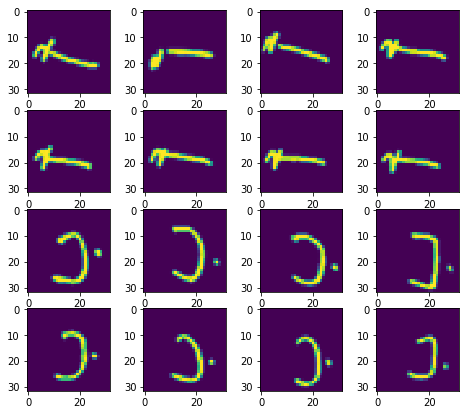

In [6]:
display_image(train_data, 32, 16)

### The test set

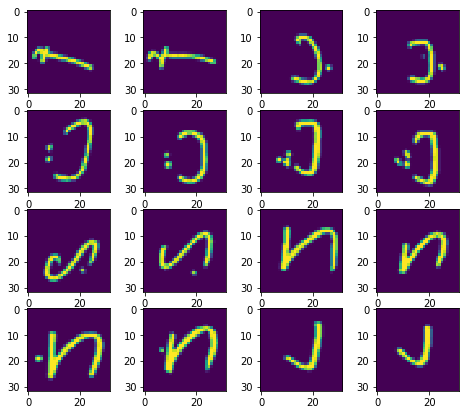

In [7]:
display_image(test_data, 32, 16)

## Data preprocessing

### Encoding categorical variables

In [8]:
import sklearn.preprocessing
label_binarizer = sklearn.preprocessing.LabelBinarizer()

train_label =label_binarizer.fit_transform(train_label)




In [9]:
train_data = train_data/255
test_data = test_data/255

In [10]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [11]:
train_data, mean1 = du.featurewise_zero_center(train_data)
test_data, mean2 = du.featurewise_zero_center(test_data)

## Building the CNN

In [12]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

### A summary of the CNN

In [13]:
recognizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [14]:
recognizer.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [16]:
datagen.fit(train_data)

## Fitting the CNN to the training data

In [21]:
obj=recognizer.fit_generator(datagen.flow(train_data,train_label, batch_size=100),
                             epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

Epoch 1/30
 - 16s - loss: 0.1347 - acc: 0.9574
Epoch 2/30
 - 15s - loss: 0.1221 - acc: 0.9597
Epoch 3/30
 - 15s - loss: 0.1239 - acc: 0.9613
Epoch 4/30
 - 15s - loss: 0.1252 - acc: 0.9610
Epoch 5/30
 - 15s - loss: 0.1297 - acc: 0.9615
Epoch 6/30
 - 15s - loss: 0.1138 - acc: 0.9638
Epoch 7/30
 - 15s - loss: 0.1160 - acc: 0.9646
Epoch 8/30
 - 15s - loss: 0.1183 - acc: 0.9625
Epoch 9/30
 - 15s - loss: 0.1175 - acc: 0.9622
Epoch 10/30
 - 15s - loss: 0.1150 - acc: 0.9636
Epoch 11/30
 - 15s - loss: 0.1130 - acc: 0.9648
Epoch 12/30
 - 15s - loss: 0.0992 - acc: 0.9684
Epoch 13/30
 - 15s - loss: 0.1006 - acc: 0.9681
Epoch 14/30
 - 15s - loss: 0.1023 - acc: 0.9661
Epoch 15/30
 - 15s - loss: 0.1024 - acc: 0.9676
Epoch 16/30
 - 15s - loss: 0.1095 - acc: 0.9672
Epoch 17/30
 - 15s - loss: 0.1018 - acc: 0.9670
Epoch 18/30
 - 15s - loss: 0.0938 - acc: 0.9701
Epoch 19/30
 - 15s - loss: 0.0976 - acc: 0.9689
Epoch 20/30
 - 15s - loss: 0.1002 - acc: 0.9713
Epoch 21/30
 - 15s - loss: 0.0941 - acc: 0.9698
E

## Making the predictions

In [22]:
predictions = recognizer.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

## Generating a confusion matrix

In [23]:
cm = confusion_matrix(test_label, predictions)

## Calculating the accuracy

In [24]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9803571428571428
